# Data exploration

some imports to start

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style='white')


## Mount Google Drive and open the csv file


To connect to the drive, mount google drive. It will ask for an authorization code (log into your account) each time you restart the runtime.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Next, cd into the directory with the dataset - hopefully this is the path to the data folder in your drive. Otherwise, modify it to that path.

In [0]:
!pwd

/content


This will navigate to the directory, then print out everything in the directory so you can see the filenames.

In [0]:
import os
filepath = "drive/My Drive/The Cool Kids/Data/"
os.chdir( filepath )
!ls

CheXpert-v1.0-small.zip  train.csv


In [0]:
filename = 'train.csv'

Now, do the usual data exploration stuff

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv(filename)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Note: when we want to use this dataset, we will have to change the filepaths to the correct filepaths for this system. I have done this before for the 50 patient thing. The code is copied here for use later.

In [0]:
!pwd

/content/drive/My Drive/The Cool Kids/Data


In [0]:
def edit_urls(url):
  pieces = url.split('/')
  newpath = 'patients1_50'
  newurl = ''
  
  #hard coding that 0 and 1 are the old path. ('CheXpert-v1.0-small/train/')
  for i, piece in enumerate(pieces):
    if i > 1:
      newurl+= '/' + piece
    elif i == 1:
      newurl += newpath
  
  return newurl
  
#testing
print(edit_urls(df_sample.iloc[0]['Path']))

NameError: ignored

In [0]:
df_sample['Path'] = df_sample['Path'].apply(edit_urls)
df_sample.head()

## Get the numbers

In [0]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [0]:
df.groupby('Sex').count()

,Path,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
Sex,,,,,,,,,,,,,,,,,,
Female,90777,90777,90777,78875,9269,17957,18470,48189,4922,36362,29495,11375,27600,31434,54543,2431,4387,48633
Male,132636,132636,132636,112151,13111,26881,27733,69589,7022,49594,41126,16233,40843,47500,78667,4061,7807,74584
Unknown,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')


Plot the distribution of ages in males/females/overall

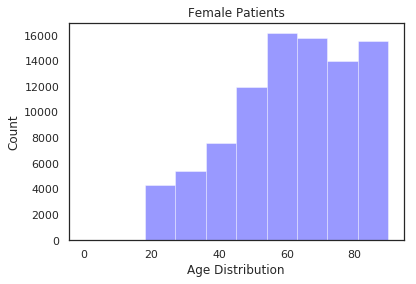

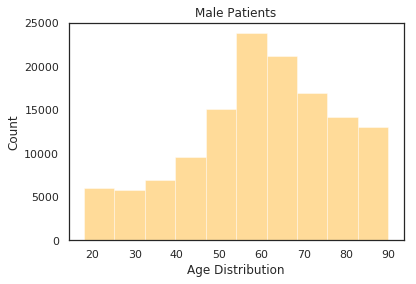

In [0]:
sns.distplot(df[(df['Sex']=='Female')]['Age'], 
         color='blue', kde=False, bins=10)
plt.title('Female Patients')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.show()

sns.distplot(df[(df['Sex']=='Male')]['Age'], 
         color='orange', kde=False, bins=10)
plt.title('Male Patients')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.show()


In [0]:
df[(df['Sex']=='Female')]['Age'].describe()

count    90777.000000
mean        61.229067
std         18.300387
min          0.000000
25%         49.000000
50%         62.000000
75%         76.000000
max         90.000000
Name: Age, dtype: float64

In [0]:
df[(df['Sex']=='Male')]['Age'].describe()

count    132636.000000
mean         59.884413
std          17.464168
min          18.000000
25%          49.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: Age, dtype: float64

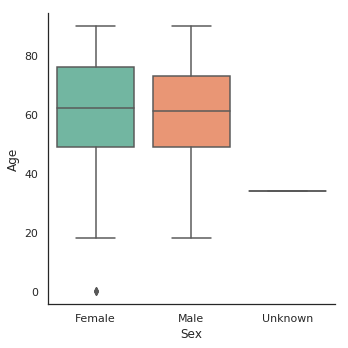

In [0]:
sns.catplot(
    x='Sex', 
    y='Age', 
#     hue='Sex',
    kind='box', 
    data=df, 
    palette=sns.color_palette('Set2'))
plt.show()

In [0]:
df[ (df['Sex']=='Female') & (df['Age'] < 18)  ]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0
223413,CheXpert-v1.0-small/train/patient64540/study1/...,Female,0,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [0]:
df[ (df['Age'] < 18)  ]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0
223413,CheXpert-v1.0-small/train/patient64540/study1/...,Female,0,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


## Exploring the different pathologies

In [0]:
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

len(outcomes)

14

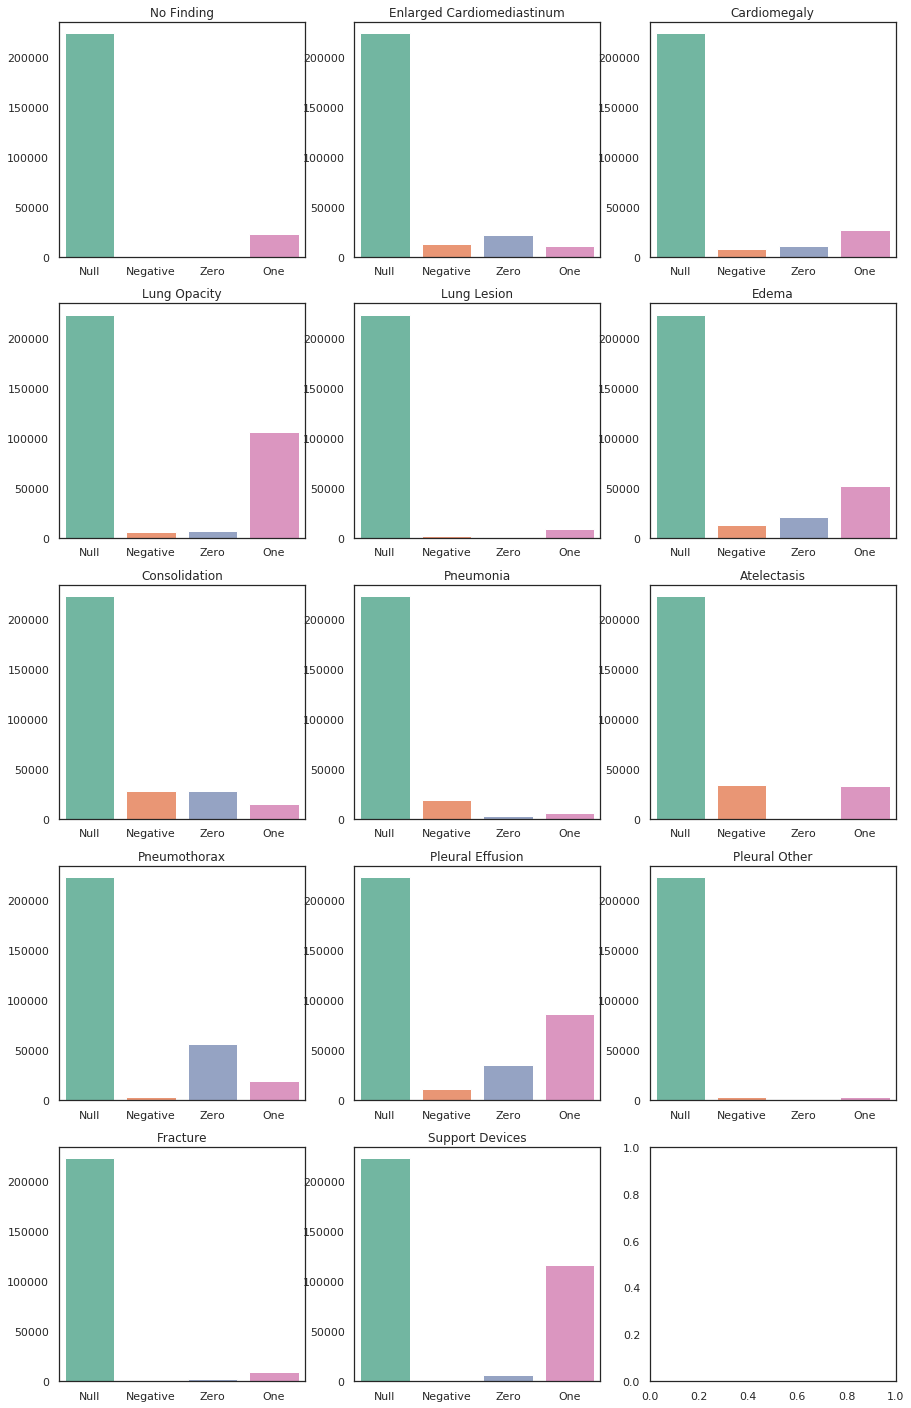

In [0]:
numrows = 5
numcols = 3

f, ax = plt.subplots(nrows=numrows, ncols=numcols, figsize=(numcols*5,numrows*5))


for subplot, pathology in enumerate(outcomes):
  nulls = df[pathology].isna().count()
  negs = df[df[pathology] == -1]['Age'].count()
  zeros = df[df[pathology] == 0]['Age'].count()
  ones = df[df[pathology]==1]['Age'].count()

  plt.subplot(numrows, numcols, subplot+1)
  
  sns.barplot(
      x = ['Null', 'Negative', 'Zero', 'One'],
      y = [nulls, negs, zeros, ones],
      palette=sns.color_palette('Set2')
  )
  plt.title(pathology)

plt.show()


There are lots of nulls, but there are also confirmed zero ‘maybe’s, so we want to figure out what to do with the nulls - would probably not want to just put zeros in those places, since there are some ‘true zeroes’

## Multiple Pathologies

Want to sum up how many pathologies each patient has.

### Add a 'number of pathologies' column

In [0]:
#We have the list of outcome categories.
#We want only the ones
#And to sum up the ones for each patient...

outcomes_only = ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

df['Num Pathologies'] = df[ df[ outcomes_only ] > 0  ].sum(axis=1)


NameError: ignored

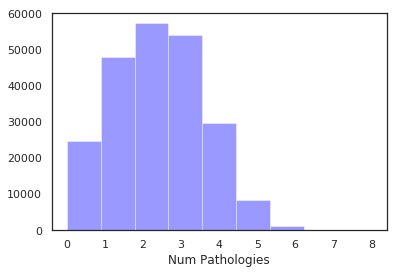

In [0]:
sns.distplot(df['Num Pathologies'], bins=9, kde=False, color='blue')
plt.show()

Many individuals have multiple pathologies at once. Can we train the model on single-pathology images? and then increase to multiple pathologies?

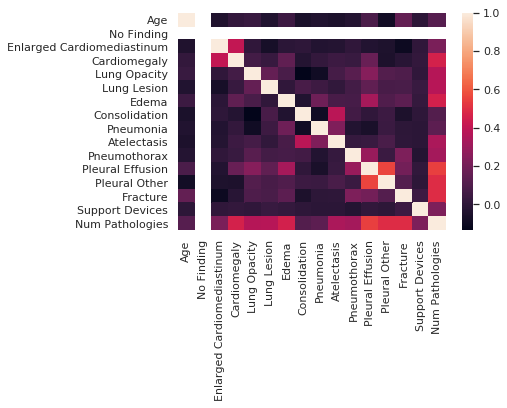

In [0]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

The number of pathologies appears to correlate better with some outcomes than others - pleural effusion, for example, has a higher number of pathologies - aka if you have pleural effusion, you’re more likely to have other things. 
Pleural effusion correlates highly with pleural other.


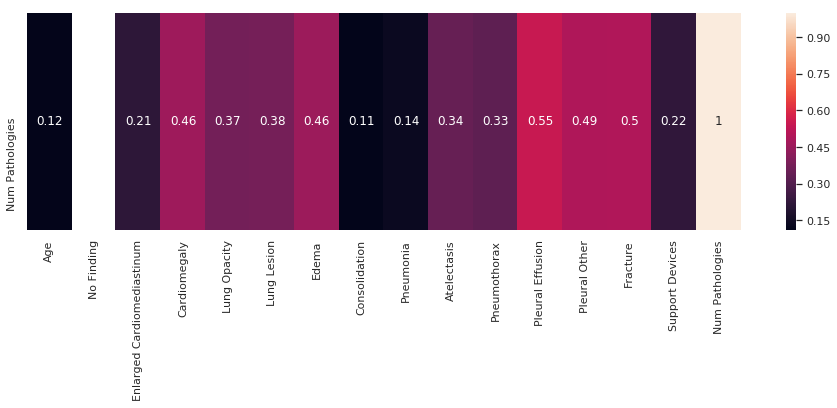

In [0]:
correlation_matrix = df.corr()

f, ax = plt.subplots(1, 1, figsize=(16, 4 ))


sns.heatmap(df.corr().loc[['Num Pathologies'],:], annot=True)
plt.show()

Reading the Stanford paper revealed that 0 = definite no, 1 = definite yes, and -1 = uncertain. (contrary to what I had assumed)

## Remove negative ones and redo correlation

replacing negatives with 1s - aka making 'maybes' into 'yes'

In [0]:
df_binary = df.copy()

for patho in outcomes:
  df_binary[patho] = df_binary[patho].apply( lambda x: 1 if x < 0 else x)

df_binary.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0


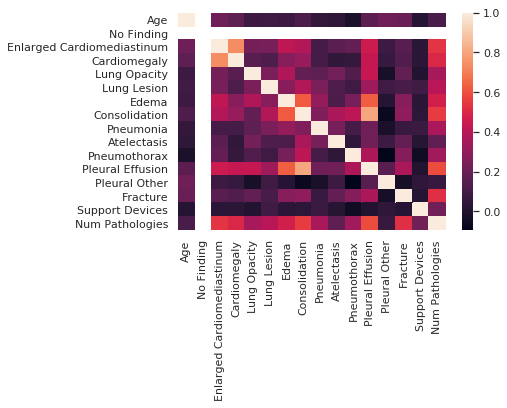

In [0]:
corr = df_binary.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

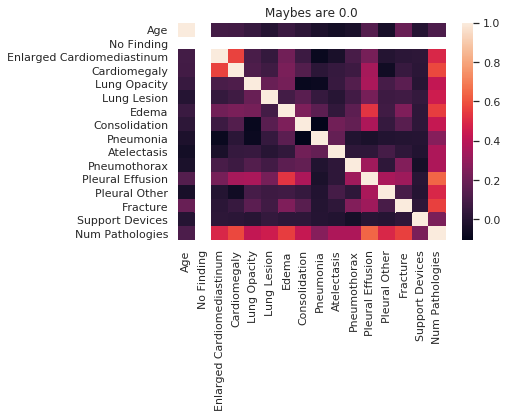

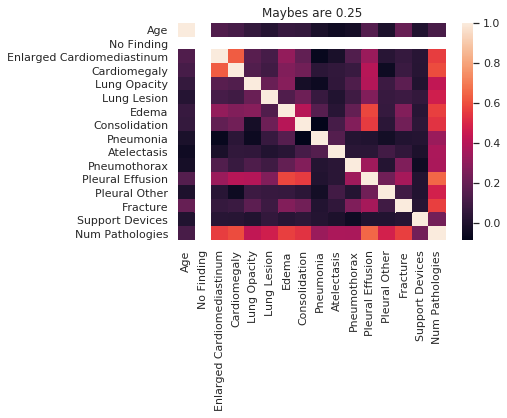

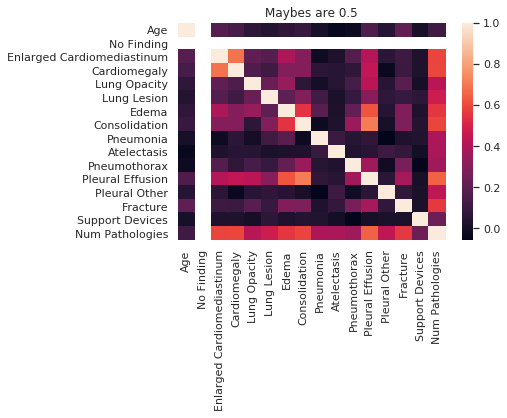

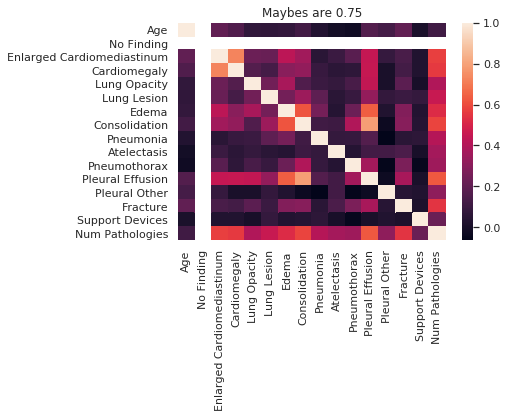

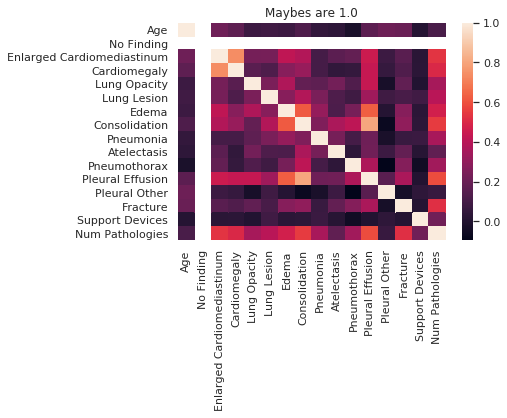

In [0]:
df_medium = df.copy()

for i in range(0,5):
  df_medium = df.copy()
  fraction = i / 4.0
  for patho in outcomes:
    df_medium[patho] = df_medium[patho].apply( lambda x: fraction if x < 0 else x)
  
  corr = df_medium.corr()
  # plot the heatmap
  sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
  plt.title(f'Maybes are {fraction}')
  plt.show()

## Other ways to fill in the data

original: 
* -1 =  maybe
* 0 = definite no
* 1 = yes


new:
* 0 = definite no AND null / not mentioned
* 1 = maybe AND yes


In [0]:
filleddf = df.copy()

for patho in outcomes:
  filleddf[patho] = filleddf[patho].apply( lambda x: 1 if x < 0 else x)

filleddf[outcomes] = filleddf[outcomes].fillna(0).astype(int)

filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,2.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0


Redo the num pathologies column for this updated dataset

In [0]:
filleddf['Num Pathologies'] = filleddf[ filleddf[ outcomes_only ] > 0  ].sum(axis=1)
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0


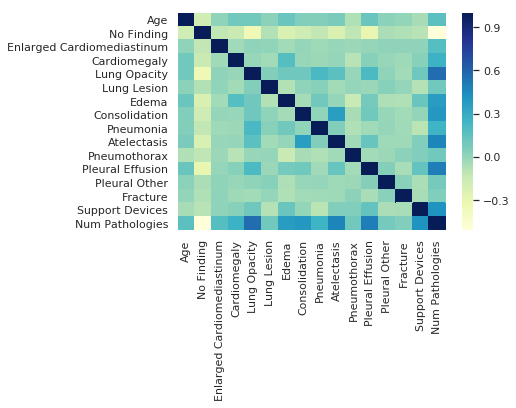

In [0]:
corr = filleddf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu"
           )

plt.show()

## Extract the patient ID to see redundant patients

In [0]:
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0


In [0]:
def extract_patient_id(url):
  wholename = url.split('/')[2]
  
  #get rid of the 'patient'
  nonpatient = wholename[7:]
  
  return nonpatient
  
#testing
print(extract_patient_id(filleddf.iloc[0]['Path']))

00001


In [0]:
filleddf['Patient ID'] = filleddf['Path'].apply(extract_patient_id)
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0,00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,00003


In [0]:
filleddf.groupby('Patient ID')['Path'].count()

Patient ID
00001     1
00002     3
00003     1
00004     2
00005     4
00006     1
00007     2
00008     2
00009     2
00010     2
00011    14
00012     6
00013     2
00014     2
00015     2
00016     2
00017     2
00018     2
00019     5
00020     1
00021     1
00022     3
00023    20
00024     3
00025     4
00026     2
00027     2
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Path, Length: 64540, dtype: int64

### Number of images per patient

In [0]:
filleddf.groupby('Patient ID')['Path'].count()

df_by_patient = pd.DataFrame( filleddf.groupby('Patient ID')['Path'].count(), 
                            index = filleddf['Patient ID'])
df_by_patient.columns = ['Num Images']
df_by_patient = df_by_patient.drop_duplicates()
df_by_patient

,Num Images
Patient ID,
00001,1
00002,3
00004,2
00005,4
00011,14
00012,6
00019,5
00023,20
00039,11


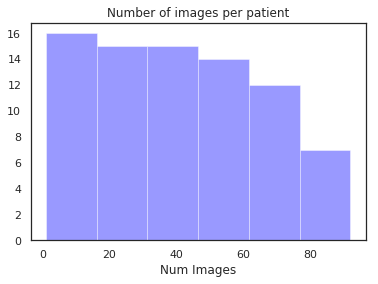

In [0]:
f, ax = plt.subplots(1,1)

sns.distplot(df_by_patient['Num Images'], kde=False, color='blue')
#ax.set_yscale('log')
plt.title('Number of images per patient')
plt.show()

### Number of studies per patient

Now we wanna know how many studies are generally done per patient, and how many images are taken per study; and what those kinds of images are.

In [0]:
def extract_studies(url):
  study = url.split('/')[3]
  
  #get rid of the 'patient'
  studynum = study[5:]
  
  return int(studynum)
  
#testing
print(extract_studies(filleddf.iloc[0]['Path']))

1


In [0]:
filleddf['Study Index'] = filleddf['Path'].apply(extract_studies)
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,00001,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0,00002,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002,1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002,1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,00003,1


In [0]:
filleddf.groupby('Patient ID')['Study Index'].count()

Patient ID
00001     1
00002     3
00003     1
00004     2
00005     4
00006     1
00007     2
00008     2
00009     2
00010     2
00011    14
00012     6
00013     2
00014     2
00015     2
00016     2
00017     2
00018     2
00019     5
00020     1
00021     1
00022     3
00023    20
00024     3
00025     4
00026     2
00027     2
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Study Index, Length: 64540, dtype: int64

The maximum study number is assumed to be equivalent to the number of studies.

In [0]:
df_by_patient['Num Studies'] = filleddf.groupby('Patient ID')['Study Index'].max()


In [0]:
df_by_patient.head()

,Num Images,Num Studies
Patient ID,,
00001,1,1
00002,3,2
00004,2,1
00005,4,2
00011,14,13


In [0]:
num_images_per_study = filleddf.groupby(['Patient ID', 'Study Index']).size()

display(num_images_per_study)

Patient ID  Study Index
00001       1              1
00002       1              2
            2              1
00003       1              1
00004       1              2
00005       1              2
            2              2
00006       1              1
00007       1              1
            2              1
00008       1              1
            2              1
00009       1              2
00010       1              2
00011       1              1
            2              1
            3              1
            4              1
            5              1
            6              1
            7              1
            8              1
            9              1
            10             1
            11             1
            12             1
            13             2
00012       1              2
            2              2
            3              2
                          ..
64515       1              1
64516       1              1
64517       1      

### Number of images per study

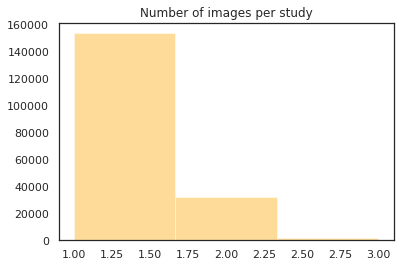

In [0]:

sns.distplot(num_images_per_study.values, kde=False, bins=3, color = 'orange')
plt.title('Number of images per study')
plt.show()

In [0]:
filleddf['Study Index'] = filleddf['Path'].apply(extract_studies)

num_studies_total = filleddf.groupby('Patient ID')['Study Index'].max()
display(num_studies_total)

Patient ID
00001     1
00002     2
00003     1
00004     1
00005     2
00006     1
00007     2
00008     2
00009     1
00010     1
00011    13
00012     3
00013     1
00014     1
00015     2
00016     1
00017     2
00018     1
00019     4
00020     1
00021     1
00022     2
00023    11
00024     2
00025     2
00026     1
00027     1
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Study Index, Length: 64540, dtype: int64

In [0]:
num_studies_total.describe()

count    64540.000000
mean         2.907360
std          4.189741
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         91.000000
Name: Study Index, dtype: float64

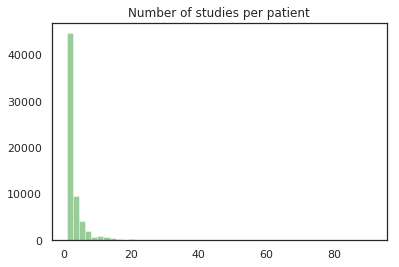

In [0]:
f, ax = plt.subplots(1,1)

sns.distplot(num_studies_total.values, kde=False, color='green')
#ax.set_yscale('log')
plt.title('Number of studies per patient')
plt.show()

In [0]:
import numpy as np

np.sort( filleddf['Study Index'].unique())


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91])

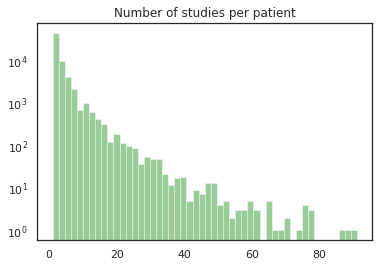

In [0]:
f, ax = plt.subplots(1,1)

sns.distplot(num_studies_total.values, kde=False, color='green')
ax.set_yscale('log')
plt.title('Number of studies per patient')
plt.show()

### Faster way of doing number of studies per patient

The below is actually a way faster version of this

In [0]:
num_studies_count = filleddf.groupby('Study Index')['Patient ID'].count()
display(num_studies_count.values)

array([82203, 36501, 22924, 15978, 11746,  8789,  6874,  5517,  4521,
        3719,  3095,  2603,  2195,  1883,  1627,  1408,  1226,  1063,
         929,   825,   725,   652,   588,   503,   474,   421,   382,
         345,   310,   288,   256,   231,   195,   176,   166,   152,
         140,   136,   118,   109,    99,    92,    97,    90,    94,
          79,    67,    66,    54,    46,    45,    43,    39,    37,
          34,    36,    33,    31,    30,    26,    24,    23,    20,
          21,    18,    15,    15,    14,    13,    13,    13,    11,
          11,    11,    10,    10,     6,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     2,     2,     2,     1,
           1])

Although actually that double counts everything, because someone with 91 studies also has a '1' study and a '2' study, etc.

In [0]:
def correct_counts(a):
  for i in range(len(a) - 1):
    a[i] = a[i] - a[i + 1]
  return a

corrected_studies = correct_counts(num_studies_count.values)
display(corrected_studies)

array([32125,  6631,  2714,  1275,  1042,   558,   361,   194,   178,
         132,    84,    96,    56,    37,    37,    19,    29,    30,
           4,    27,     9,   -21,    56,   -24,    14,     2,     2,
          13,   -10,     7,   -11,    17,     9,    -4,     2,     8,
         -14,     9,    -1,     3,    12,   -12,    11,   -19,     3,
          11,   -11,     4,     7,    -1,    -2,     2,    -1,     5,
          -5,     1,     1,    -3,     2,     1,    -2,     4,    -4,
           0,     3,    -1,     0,     1,     0,    -2,     2,     0,
          -1,     1,    -4,     1,     3,     0,     0,     0,     0,
           0,     0,     0,    -1,     1,     0,    -1,     1,    -1,
           1])

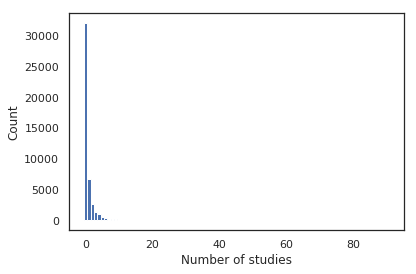

In [0]:
plt.bar(
    x=range(91), 
    height= corrected_studies,
    width = 1)
#plt.ylim([-5,10])
plt.xlabel("Number of studies")
plt.ylabel("Count")
plt.show()

So this plot is showing us the number of studies one person is involved in.

Number of unique patients

In [0]:
filleddf['Patient ID'].unique().size

64540

There are 64540 unique patients, based on ID numbers (confirmed based on what we expect from the dataset). About half of those patients were in just one study. Many had 2 studies, and a few people participated in more than 80 studies.


Counting the number of patient IDs when grouped by study number, we get:
array([82203, 36501, etc])
Which implies that there are 82203 ‘study 1’ folders… however, there are only 64000ish unique patients, so there must be some patients with multiple ‘study 1’ folders? Or something else happened.
OK nevermind it's because this counted the number of images total per study, and some studies had more than one image (more than one dataset entry)

## Filter out patients involved in too many studies

We are thinking that people who are involved in lots of studies are sicker, so we will remove patients in the top 5% of number of studies.

In [0]:
smalldf = filleddf.copy()

smalldf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,00001,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0,00002,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002,1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0,00002,1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,00003,1


In [0]:
num_studies_total = smalldf.groupby('Patient ID')['Study Index'].max()

In [0]:
num_studies_total.describe()

count    64540.000000
mean         2.907360
std          4.189741
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         91.000000
Name: Study Index, dtype: float64

In [0]:
np.percentile(num_studies_total, 75)

3.0

In [0]:
np.percentile(num_studies_total, 95)

10.0

Nice, the 95th percentile for the number of studies is 10 studies, which is a nice even number too. 



In [0]:
np.percentile(num_studies_total, 99)

20.0

The top 1% participated in 20 studies.


Now we have to figure out which patients are involved in more than 20 studies and remove those patients.

We could make a list of all the patient IDs of people with a study index of 20 or more.

In [0]:
manystudies = smalldf[ smalldf['Study Index'] >= 20 ]

'manystudies' now contains all of the studies that are greater than 20 - so we scrape for the user ID numbers.

In [0]:
ids_to_remove = manystudies['Patient ID'].unique()
ids_to_remove

array(['00069', '00114', '00128', '00146', '00294', '00310', '00314',
       '00326', '00426', '00463', '00467', '00631', '00693', '00703',
       '00750', '00826', '00877', '00888', '01051', '01071', '01141',
       '01167', '01221', '01457', '01489', '01545', '01595', '01671',
       '01772', '01817', '01844', '01873', '02001', '02009', '02013',
       '02080', '02146', '02153', '02377', '02378', '02382', '02476',
       '02533', '02662', '02847', '02936', '03027', '03107', '03122',
       '03281', '03428', '03452', '03532', '03629', '03685', '03763',
       '03781', '04050', '04064', '04083', '04091', '04102', '04135',
       '04366', '04427', '04462', '04468', '04654', '04722', '04774',
       '04817', '04881', '04929', '04998', '05068', '05109', '05165',
       '05179', '05189', '05232', '05702', '05735', '05745', '05804',
       '06028', '06057', '06081', '06166', '06236', '06309', '06338',
       '06395', '06449', '06458', '06464', '06516', '06578', '06591',
       '06655', '068

Now we have a list of all the patients we want to remove.

In [0]:
smalldf = smalldf[ ~ smalldf['Patient ID'].isin(ids_to_remove) ]

Now check if we removed the people with more than 20 studies

In [0]:
smalldf['Study Index'].describe()

count    199518.000000
mean          3.217730
std           3.111967
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          19.000000
Name: Study Index, dtype: float64

## Seperate sets by image type

lateral, frontal (AP and PA)

In [0]:
smalldf.head(1)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,00001,1


In [0]:
smalldf.groupby('Frontal/Lateral')['Path'].count()

Frontal/Lateral
Frontal    168968
Lateral     30550
Name: Path, dtype: int64

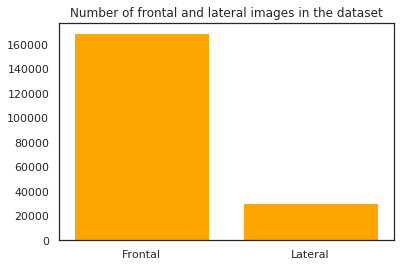

In [0]:
plt.bar(['Frontal', 'Lateral'], 
        height = smalldf.groupby('Frontal/Lateral')['Path'].count(),
        color = 'orange'
       )
plt.title('Number of frontal and lateral images in the dataset')
plt.show()

In [0]:
smalldf.groupby('AP/PA')['Path'].count()

AP/PA
AP    141191
LL        15
PA     27761
RL         1
Name: Path, dtype: int64

In [0]:
smalldf['Image Type'] = smalldf['AP/PA'].fillna('Lateral')

In [0]:
smalldf['Image Type'].unique()

array(['AP', 'Lateral', 'PA', 'LL', 'RL'], dtype=object)

In [0]:
smalldf.groupby('Image Type')['Path'].count()

Image Type
AP         141191
LL             15
Lateral     30550
PA          27761
RL              1
Name: Path, dtype: int64

For some reason doing 'column.unique' gives a different ordering than groupby. So that's annoying and means we have to manually give the labels

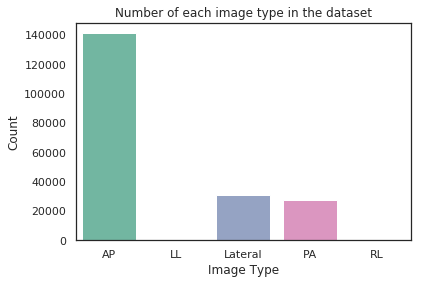

In [0]:
sns.barplot(
    x = ['AP','LL', 'Lateral', 'PA', 'RL'],
    y = smalldf.groupby('Image Type')['Path'].count(),
    palette=sns.color_palette('Set2')
)
plt.title('Number of each image type in the dataset')
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.show()


My assumption is that lateral images are used as a supplement to frontal images. Is this true?

Per each study, how many lateral images are there? how many frontal images?

In [0]:
counting = smalldf.groupby(
    ['Patient ID', 'Study Index', 'Image Type']
)['Path'].count()
counting

Patient ID  Study Index  Image Type
00001       1            AP            1
00002       1            AP            1
                         Lateral       1
            2            AP            1
00003       1            AP            1
00004       1            Lateral       1
                         PA            1
00005       1            Lateral       1
                         PA            1
            2            AP            2
00006       1            AP            1
00007       1            AP            1
            2            AP            1
00008       1            AP            1
            2            AP            1
00009       1            Lateral       1
                         PA            1
00010       1            Lateral       1
                         PA            1
00011       1            AP            1
            2            AP            1
            3            AP            1
            4            AP            1
            5        

In [0]:
#using a pivot table

table = pd.pivot_table(smalldf, 
                    values = 'Image Type',
                    index=['Patient ID', 'Study Index'],
                    #columns=['Image Type'], 
                    aggfunc=np.sum
                   )

table

Image Type
Patient ID Study Index           
00001      1                   AP
00002      1            APLateral
           2                   AP
00003      1                   AP
00004      1            PALateral
00005      1            PALateral
           2                 APAP
00006      1                   AP
00007      1                   AP
           2                   AP
00008      1                   AP
           2                   AP
00009      1            PALateral
00010      1            PALateral
00011      1                   AP
           2                   AP
           3                   AP
           4                   AP
           5                   AP
           6                   AP
           7                   AP
           8                   AP
           9                   AP
           10                  AP
           11                  AP
           12                  AP
           13           PALateral
00012      1            PALateral
           2            PALateral
           3            PALateral
...                           ...
64515      1                   AP
64516      1                   AP
64517      1                   AP
64518      1                   AP
64519      1                   AP
64520      1                   AP
64521      1                   AP
64522      1                   AP
64523      1                   AP
64524      1                   AP
64525      1                   AP
64526      1                   AP
64527      1                   AP
           2                   AP
64528      1                   AP
64529      1                   AP
64530      1                   AP
64531      1                   AP
64532      1                   AP
64533      1                   AP
           2                   AP
64534      1                   AP
64535      1                   AP
64536      1                   AP
           2                   AP
64537      1                   AP
           2                   AP
64538      1                   AP
64539      1                   AP
64540      1                   AP

[165838 rows x 1 columns]

In [0]:
labels = np.sort(table['Image Type'].unique())
labels

array(['AP', 'APAP', 'APAPAP', 'APAPLateral', 'APLLLateral', 'APLateral',
       'APLateralAP', 'APLateralLateral', 'APLateralPA', 'APPA',
       'APPALateral', 'APPAPA', 'APRL', 'LLLateralAP', 'Lateral',
       'LateralAP', 'LateralAPAP', 'LateralLateral', 'LateralLateralAP',
       'LateralPA', 'LateralPAAP', 'PA', 'PAAP', 'PAAPAP', 'PAAPLateral',
       'PAAPPA', 'PALLLateral', 'PALateral', 'PALateralAP', 'PALateralLL',
       'PALateralLateral', 'PALateralPA', 'PAPA', 'PAPALL', 'PAPALateral',
       'PAPAPA'], dtype=object)

There does appear to be a 'lateral only' group

In [0]:
counts = table.groupby('Image Type')['Image Type'].count()
counts

Image Type
AP                  131876
APAP                  2200
APAPAP                  27
APAPLateral             42
APLLLateral              1
APLateral             3246
APLateralAP             40
APLateralLateral       379
APLateralPA              3
APPA                    15
APPALateral             20
APPAPA                   1
APRL                     1
LLLateralAP              2
Lateral                 13
LateralAP              819
LateralAPAP             12
LateralLateral           2
LateralLateralAP        81
LateralPA                2
LateralPAAP              1
PA                    1965
PAAP                    19
PAAPAP                   3
PAAPLateral             26
PAAPPA                   1
PALLLateral              2
PALateral            23895
PALateralAP             25
PALateralLL              9
PALateralLateral       452
PALateralPA            243
PAPA                    89
PAPALL                   1
PAPALateral            321
PAPAPA                   4
Name: Image Type,

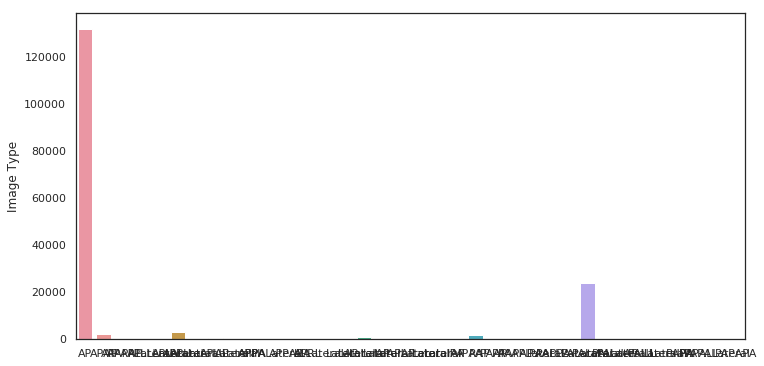

In [0]:
plt.figure( figsize=(12,6))

sns.barplot(
  x = labels,
  y = counts
)
plt.show()

This figure is ugly as hell so we'll do some processing on it

In [0]:
categories = ['Lateral only', 'Frontal Only', 'Both', 'Neither']

def findtype(label):
  #lateral and frontal are booleans
  lateral = not (label.find('Lateral') == -1)
  frontal = not (label.find('PA') == -1 and label.find('AP') == -1)
  
  if lateral and frontal:
    return "Both"
  elif lateral:
    return "Lateral"
  elif frontal:
    return "Frontal"
  else:
    return "Other"

testset = ['APPA', 'Lateral', 'APAP', 'PAAP']
for label in testset: 
  print(label)
  print( 'has lateral', not label.find('Lateral') == -1)
  print( 'has PA', not label.find('PA') == -1 )
  print( 'has AP', not label.find('AP') == -1 )
  print( 'has either AP or PA', not (label.find('PA') == -1 and label.find('AP') == -1) )
  print( findtype(label) )
  print('****')

APPA
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****
Lateral
has lateral True
has PA False
has AP False
has either AP or PA False
Lateral
****
APAP
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****
PAAP
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****


In [0]:
for label in labels:
  print(label, 'is', findtype(label))

AP is Frontal
APAP is Frontal
APAPAP is Frontal
APAPLateral is Both
APLLLateral is Both
APLateral is Both
APLateralAP is Both
APLateralLateral is Both
APLateralPA is Both
APPA is Frontal
APPALateral is Both
APPAPA is Frontal
APRL is Frontal
LLLateralAP is Both
Lateral is Lateral
LateralAP is Both
LateralAPAP is Both
LateralLateral is Lateral
LateralLateralAP is Both
LateralPA is Both
LateralPAAP is Both
PA is Frontal
PAAP is Frontal
PAAPAP is Frontal
PAAPLateral is Both
PAAPPA is Frontal
PALLLateral is Both
PALateral is Both
PALateralAP is Both
PALateralLL is Both
PALateralLateral is Both
PALateralPA is Both
PAPA is Frontal
PAPALL is Frontal
PAPALateral is Both
PAPAPA is Frontal


In [0]:
category_dict = {
    'Frontal': 0,
    'Lateral': 0,
    'Both': 0
}

for label in counts.index:
  category_dict[ findtype(label) ] += counts[label]

print (category_dict)  

{'Frontal': 136202, 'Lateral': 15, 'Both': 29621}


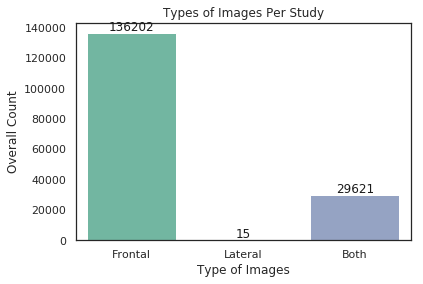

In [0]:
g = sns.barplot(
  x = list(category_dict.keys()),
  y = list(category_dict.values()),
  palette = sns.color_palette('Set2'),
  
)

#Add some labels. code from stackoverflow
for p in g.patches:
  g.text(p.get_x() + p.get_width()/2., 
          p.get_height(), 
          '%d' % int(p.get_height()), 
          fontsize=12, 
          color='k', 
          ha='center', 
          va='bottom'
         )

plt.title('Types of Images Per Study')
plt.xlabel("Type of Images")
plt.ylabel("Overall Count")
plt.show()

Very very few have only lateral images. Mostly, studies only do a frontal image.
